In [29]:
#Using battery discharge data to predict SOH, given calculated test data. 

#What is the correlation between SOH and ambient/temperature in SOH predictive analysis?

my_data = pd.read_csv('dis_ele.csv')

for i in my_data.columns: #get all columns for test data
    print(i)

my_data.head()


#168 individual cases for testing purposes.

Voltage_measured
Current_measured
Temperature_measured
Current_charge
Voltage_charge
Time
cycle_type
start_time
ambient_temperature
Current_load
Voltage_load
Capacity
Sense_current
Battery_current
Current_ratio
Battery_impedance
Rectified_Impedance
Re
Rct
Corrected_time
current_impedance
ΔT
Δt
temp_gradient
Heat_generated
heat_flux
heat_loss_rate
convective_heat_transfer
SoH


In [25]:
#Isolate features for testing

SoH_test = my_data[['Voltage_measured','Current_measured','Temperature_measured','ambient_temperature','Corrected_time','SoH']]
SoH_test.head()

,Voltage_measured,Current_measured,Temperature_measured,ambient_temperature,Corrected_time,SoH
0,4.191492,-0.004902,24.330034,24,7597.875,1.000000
1,4.189773,0.000021,24.697752,24,21804.109,0.994527
2,4.188187,-0.001754,24.734266,24,35961.000,0.988614
3,4.188461,-0.002775,24.654236,24,50010.531,0.988567
4,4.188299,-0.007981,24.524797,24,64137.297,0.988235


In [70]:
#Start out with a simple LinearRegression model (base). Import various regression packages: 

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y = SoH_test["SoH"]
X = SoH_test.drop(["SoH"], axis=1) #

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_train = regressor.predict(X_train)

Y_pred_test = regressor.predict(X_test)

#Develop upon error statistics for further analysis.


train_review = pd.DataFrame({"Model Prediction": Y_pred_train,
             "Expected/Real values": Y_train})

abs_error = (abs(Y_pred_test - Y_test))

test_review = pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test, "Absolute Error": abs_error})

my_error = mean_squared_error(Y_test, Y_pred_test, squared=False)

abs_prev = 0

error_analysis_all = pd.DataFrame()

#for i in range(0, len(Y_pred_test)):
new_abs = abs_error
avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
print(avg_error)
error_analysis_allfeat = pd.DataFrame({'Variable Tested': 'Temp + AmbTemp',"Average Error": avg_error})
#error_analysis_old = pd.concat([error_analysis_all, error_analysis_new])
abs_prev = new_abs



#abs_error = (abs(Y_pred_test - Y_test))
    #new_abs = abs_error
    #avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
    #count = i + 1
    #error_analysis_all['Variable Tested']= 'Temp + AmbTemp'
    #error_analysis_all['Count']= count
    #error_analysis_all['Average Error'] = avg_error.iloc[i]

    
r2 = r2_score(Y_test, Y_pred_test)
print('Error stats:' , my_error, r2)

error_analysis_allfeat.head(42)
error_analysis_allfeat.describe()

99     0.004994
20     0.138781
103    0.003413
139    0.036716
108    0.030715
38     0.046163
71     0.006414
145    0.037699
109    0.031219
55     0.060089
114    0.030785
156    0.064285
29     0.089496
39     0.023047
153    0.038984
166    0.016625
1      0.168248
65     0.026034
125    0.053028
129    0.042531
36     0.048136
19     0.137829
11     0.014743
86     0.006163
84     0.008357
158    0.043100
135    0.032124
88     0.009274
137    0.001803
164    0.031663
159    0.049548
113    0.035588
44     0.054090
9      0.013872
15     0.016583
120    0.009284
46     0.055755
43     0.048619
26     0.098969
127    0.053477
122    0.036054
117    0.056313
Name: SoH, dtype: float64
Error stats: 0.05652848449193189 0.7185986207123853


,Average Error
count,42.000000
mean,0.043110
std,0.037009
min,0.001803
25%,0.016593
50%,0.036385
75%,0.053365
max,0.168248


In [75]:
#Start out with a simple LinearRegression model (base). Import various regression packages: 

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y = SoH_test["SoH"]
X = SoH_test.drop(["SoH","Temperature_measured","ambient_temperature"], axis=1) #

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_train = regressor.predict(X_train)

Y_pred_test = regressor.predict(X_test)

#Develop upon error statistics for further analysis.


train_review = pd.DataFrame({"Model Prediction": Y_pred_train,
             "Expected/Real values": Y_train})

abs_error = (abs(Y_pred_test - Y_test))

test_review = pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test, "Absolute Error": abs_error})

my_error = mean_squared_error(Y_test, Y_pred_test, squared=False)

abs_prev = 0

#for i in range(0, len(Y_pred_test)):
new_abs = abs_error
avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
print(avg_error)
error_analysis_neitherfeat = pd.DataFrame({'Variable Tested': 'Neither',"Average Error": avg_error})
#error_analysis_old = pd.concat([error_analysis_all, error_analysis_new])
abs_prev = new_abs



#abs_error = (abs(Y_pred_test - Y_test))
    #new_abs = abs_error
    #avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
    #count = i + 1
    #error_analysis_all['Variable Tested']= 'Temp + AmbTemp'
    #error_analysis_all['Count']= count
    #error_analysis_all['Average Error'] = avg_error.iloc[i]

    
r2 = r2_score(Y_test, Y_pred_test)
print('Error stats:' , my_error, r2)

error_analysis_neitherfeat.head(42)
error_analysis_neitherfeat.describe()

75     0.000835
109    0.035936
82     0.020841
136    0.001403
113    0.041810
126    0.045036
106    0.015825
132    0.038733
112    0.030501
143    0.040154
99     0.010806
64     0.039613
128    0.069757
71     0.007511
92     0.010893
152    0.024033
89     0.047193
162    0.041182
21     0.104852
60     0.031891
144    0.042932
59     0.001314
3      0.159096
44     0.051644
163    0.041069
88     0.000274
125    0.051907
68     0.008479
34     0.059846
121    0.019583
139    0.034814
102    0.012022
8      0.084155
78     0.006166
131    0.049522
29     0.082158
17     0.077489
154    0.045194
84     0.011422
2      0.180936
0      0.198130
148    0.047919
Name: SoH, dtype: float64
Error stats: 0.0638868722591099 0.574581237369956


,Average Error
count,42.000000
mean,0.045830
std,0.045049
min,0.000274
25%,0.012972
50%,0.039884
75%,0.051114
max,0.198130


In [78]:
#Start out with a simple LinearRegression model (base). Import various regression packages: 

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y = SoH_test["SoH"]
X = SoH_test.drop(["SoH","ambient_temperature"], axis=1) #

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_train = regressor.predict(X_train)

Y_pred_test = regressor.predict(X_test)

#Develop upon error statistics for further analysis.


train_review = pd.DataFrame({"Model Prediction": Y_pred_train,
             "Expected/Real values": Y_train})

abs_error = (abs(Y_pred_test - Y_test))

test_review = pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test, "Absolute Error": abs_error})

my_error = mean_squared_error(Y_test, Y_pred_test, squared=False)

abs_prev = 0

#for i in range(0, len(Y_pred_test)):
new_abs = abs_error
avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
print(avg_error)
error_analysis_temp = pd.DataFrame({'Variable Tested': 'Temp',"Average Error": avg_error})
#error_analysis_old = pd.concat([error_analysis_all, error_analysis_new])
abs_prev = new_abs



#abs_error = (abs(Y_pred_test - Y_test))
    #new_abs = abs_error
    #avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
    #count = i + 1
    #error_analysis_all['Variable Tested']= 'Temp + AmbTemp'
    #error_analysis_all['Count']= count
    #error_analysis_all['Average Error'] = avg_error.iloc[i]

    
r2 = r2_score(Y_test, Y_pred_test)
print('Error stats:' , my_error, r2)

error_analysis_temp.describe()

0      0.188174
72     0.037333
58     0.036564
74     0.006401
42     0.064155
93     0.005468
84     0.006014
56     0.057869
20     0.131594
96     0.006940
52     0.053472
145    0.032877
10     0.033560
21     0.115069
31     0.078883
85     0.014992
120    0.007677
25     0.105906
66     0.030607
150    0.031461
8      0.071405
45     0.039959
75     0.005114
5      0.102825
38     0.045032
33     0.068592
134    0.025899
139    0.026606
44     0.053385
164    0.029585
167    0.026554
35     0.057496
95     0.004121
26     0.096296
105    0.007581
142    0.028057
50     0.066243
140    0.022397
2      0.165629
114    0.027494
153    0.029164
14     0.026139
Name: SoH, dtype: float64
Error stats: 0.06526914264702009 0.6034751508667304


,Average Error
count,42.000000
mean,0.049300
std,0.043292
min,0.004121
25%,0.025959
50%,0.033218
75%,0.065721
max,0.188174


In [80]:
#Start out with a simple LinearRegression model (base). Import various regression packages: 

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Y = SoH_test["SoH"]
X = SoH_test.drop(["SoH","Temperature_measured"], axis=1) #

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_train = regressor.predict(X_train)

Y_pred_test = regressor.predict(X_test)

#Develop upon error statistics for further analysis.


train_review = pd.DataFrame({"Model Prediction": Y_pred_train,
             "Expected/Real values": Y_train})

abs_error = (abs(Y_pred_test - Y_test))

test_review = pd.DataFrame({"Model Prediction": Y_pred_test,
             "Expected/Real values": Y_test, "Absolute Error": abs_error})

my_error = mean_squared_error(Y_test, Y_pred_test, squared=False)

abs_prev = 0

#for i in range(0, len(Y_pred_test)):
new_abs = abs_error
avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
print(avg_error)
error_analysis_ambtemp = pd.DataFrame({'Variable Tested': 'Temp',"Average Error": avg_error})
#error_analysis_old = pd.concat([error_analysis_all, error_analysis_new])
abs_prev = new_abs



#abs_error = (abs(Y_pred_test - Y_test))
    #new_abs = abs_error
    #avg_error = (((abs_prev * (i+1)) + new_abs)/(i+1))
    #count = i + 1
    #error_analysis_all['Variable Tested']= 'Temp + AmbTemp'
    #error_analysis_all['Count']= count
    #error_analysis_all['Average Error'] = avg_error.iloc[i]

    
r2 = r2_score(Y_test, Y_pred_test)
print('Error stats:' , my_error, r2)

error_analysis_ambtemp.describe()

131    0.045428
103    0.013810
79     0.002424
29     0.098078
77     0.017636
15     0.023938
133    0.037501
13     0.018207
75     0.005663
157    0.030011
81     0.008586
63     0.027098
113    0.036412
5      0.089220
61     0.038062
41     0.027825
91     0.024476
23     0.100229
121    0.017058
18     0.090321
88     0.002604
7      0.098393
32     0.075319
98     0.013983
123    0.032344
36     0.052048
76     0.004264
162    0.039522
25     0.115998
161    0.046314
159    0.039300
0      0.172241
20     0.134789
92     0.005532
90     0.017459
83     0.002140
62     0.005781
50     0.062287
95     0.002147
150    0.039752
16     0.054195
71     0.000415
Name: SoH, dtype: float64
Error stats: 0.058041789546386516 0.6407959254902307


,Average Error
count,42.000000
mean,0.042114
std,0.040424
min,0.000415
25%,0.013853
50%,0.031177
75%,0.053658
max,0.172241


In [82]:
#combine instantaneous error data for all tests

combined_error_analysis = pd.concat([error_analysis_allfeat, error_analysis_neitherfeat, error_analysis_temp, error_analysis_ambtemp], axis=0)
combined_error_analysis.describe()

,Average Error
count,168.000000
mean,0.045089
std,0.041275
min,0.000274
25%,0.015617
50%,0.036233
75%,0.054585
max,0.198130


In [83]:
#to_csv

combined_error_analysis.to_csv('CombinedErrorAnalysisAllTests.csv')

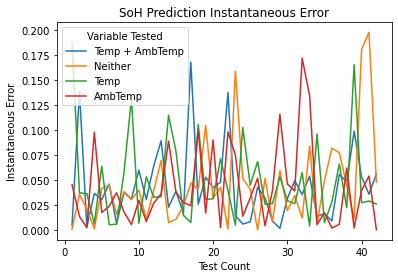

In [89]:
#Graph error analysis
test_data = pd.read_csv('CombinedErrorAnalysisAllTests_Corrected.csv')

import seaborn as sns
import matplotlib as plt

test_data.head()

#Plot test data: instantaneous error over count (per test)

ax = sns.lineplot(data=test_data, x='Count',y='Instantaneous Error', hue = 'Variable Tested').set(xlabel='Test Count',ylabel='Instantaneous Error',title='SoH Prediction Instantaneous Error')
plt.pyplot.savefig('ML_SoHInstantaneous.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)